# Активность сайта Хартия97

Анализ активности сайта http://charter97.org. Изучается динамика публикаций и комментариев пользователей с 25 сентября 2007 по 31 декабря 2016 гг.

*Просьба подсказать, как правильно вывести данные в график matplotlib (с сортировкой по годам по возрастанию).

In [4]:
# Загружаем необходимые для работы модули:
import csv
import datetime
from collections import defaultdict, OrderedDict
from operator import itemgetter
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Загружаем файл с данными, преобразуем каждую строчку в словарь и смотрим объем данных:
with open("data/charter97.csv") as csv_file:
    data = [datum for datum in csv.DictReader(csv_file)]
len(data)

228575

In [10]:
# В файле 228 575 строчек. Каждая строчка - это статья на Хартии.
# Смотрим, какие данные находятся в отдельной строчке:
data[0]

{'comments': '2116',
 'date': '2012-03-17',
 'link': 'http://charter97.org/ru/news/2012/3/17/49399/',
 'title': 'Владислава Ковалева расстреляли'}

## Структура данных

Для отдельной записи указаны:

- Название статьи
- Дата публикации
- Количество комментариев
- Гиперссылка

Простейшая аналитическая операция, которую можно сделать - это посмотреть динамику статей и комментариев во времени. Для этого нужно узнать, сколько статей и комментариев публикуется в год:

In [6]:
# Для удобства расчетов меняем тип переменной comments со строкового на целочисленный:
for datum in data:
    datum["comments"] = int(datum["comments"])

In [7]:
# Делаем две выборки: одну для статей, вторую для комментариев:
articles = defaultdict(int)
comments = defaultdict(int)

for datum in data:
    date_string = datum["date"]
    d = datetime.datetime.strptime(date_string, "%Y-%m-%d")
    year = d.strftime("%Y")
    articles[year] += 1
    comments[year] += datum["comments"]

In [8]:
# Распечатываем обе выборки и смотрим, что получилось:
articles

defaultdict(int,
            {'2007': 2479,
             '2008': 10113,
             '2009': 10686,
             '2010': 9310,
             '2011': 10519,
             '2012': 15916,
             '2013': 18318,
             '2014': 49698,
             '2015': 51242,
             '2016': 50294})

In [30]:
comments

defaultdict(int,
            {'2007': 10845,
             '2008': 84198,
             '2009': 144082,
             '2010': 187705,
             '2011': 488683,
             '2012': 552026,
             '2013': 630968,
             '2014': 678360,
             '2015': 414918,
             '2016': 466314})

## Предварительные выводы

1. Пик публикаций на Хартии приходится на 2015 год - 51 242 материала. Это в среднем около 140 материалов в день.
2. Это почти в 3 раза больше материалов, чем было опубликовано в 2013 году. Очень внушительный рост за 2 года.
3. Пик комментариев пользователей пришелся на 2014 год - 678 360. С тех по комментариям Хартия откатилась на уровень 2011 года.

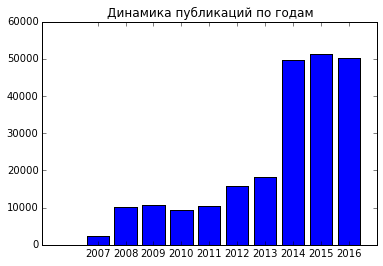

In [12]:
# Строим график для статей, чтобы было нагляднее
articles_ordered = OrderedDict(sorted(articles.items()))

plt.bar(range(len(articles_ordered)), articles_ordered.values(), align="center")
plt.xticks(range(len(articles_ordered)), articles_ordered.keys())
plt.title(u'Динамика публикаций по годам')

plt.show()

На картинке хорошо видно, что после существенного роста по количеству материалов в 2014 году Хартия достигла пика в 2015 году, а в 2016 году сдала. Вопрос в том, смогут ли редакция сайта и спонсоры проекта удержать этот уровень дальше.

Беглый контент-анализ показывает, что с началом Майдана в Украине Хартия активно освещала украинские события и даже сделала у себя специальный раздел "Украина". В настоящее время этот раздел убран в подвал главной страницы сайта.

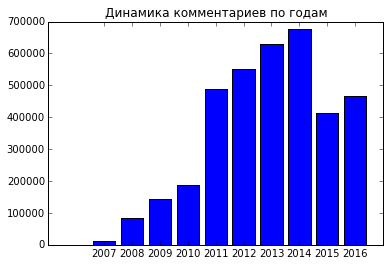

In [13]:
# Строим график для динамики опубликованных комментариев
comments_ordered = OrderedDict(sorted(comments.items()))

plt.bar(range(len(comments_ordered)), comments_ordered.values(), align="center")
plt.xticks(range(len(comments_ordered)), comments_ordered.keys())
plt.title(u"Динамика комментариев по годам")

plt.show()

Видим, что по активности комментаторов Хартия заметно просела уже в 2015 году.

In [22]:
# Ради интереса определяем наиболее комментируемые материалы по годам:
articles_clustered_by_year = defaultdict(list)
for datum in data:
    date_string = datum["date"]
    d = datetime.datetime.strptime(date_string, "%Y-%m-%d")
    year = d.strftime("%Y")
    articles_clustered_by_year[year].append(datum)

In [23]:
svodka_po_godam = {}
for year in articles_clustered_by_year.keys():
    articles_clustered_by_year[year] = sorted(articles_clustered_by_year[year], key = itemgetter("comments"), reverse = True)
    svodka_po_godam[year] = articles_clustered_by_year[year][0]

In [26]:
years = sorted([year for year in svodka_po_godam.keys()])
for year in years:
    print(year, "--",\
          svodka_po_godam[year]["title"], "--",\
          svodka_po_godam[year]["comments"], "--",\
          svodka_po_godam[year]["link"])

2007 -- Белорусские рок-музыканты пообещали не играть на акциях протеста -- 226 -- http://charter97.org/ru/news/2007/11/22/1767/
2008 -- На праздничном концерте в Минске прогремел взрыв. Пострадали около 50 человек (Фото, видео) -- 281 -- http://charter97.org/ru/news/2008/7/4/7904/
2009 -- Нацбанк «обвалил» белорусский рубль -- 332 -- http://charter97.org/ru/news/2009/1/1/13599/
2010 -- Санникова ночью доставили в КГБ, Ирина Халип в тюрьме на Окрестина (Фото) -- 710 -- http://charter97.org/ru/news/2010/12/20/34827/
2011 -- Последнее письмо Саше -- 1459 -- http://charter97.org/ru/news/2011/5/31/39115/
2012 -- Владислава Ковалева расстреляли -- 2116 -- http://charter97.org/ru/news/2012/3/17/49399/
2013 -- Едущих на шопинг за границу обложат пошлиной в $100 -- 902 -- http://charter97.org/ru/news/2013/9/6/75218/
2014 -- Водитель минского автобуса похвастался 20 авариями за год (Видео) -- 670 -- http://charter97.org/ru/news/2014/1/6/83269/
2015 -- Лукашенко подписал декрет о «тунеядцах» -- 

## Наблюдения

Больше всего комментариев оставлено в 2012 году под статьей "Владислава Ковалева расстреляли" (2116). Именно этот материал Хартия вывела в топ с рекордной интенсивностью обсуждения.

В целом, материалы сайта, которые выводятся в топ по комментариям, имеют социально-бытовую тематику: цены, зарплаты, общественная безопасность. Политические вещи - выборы, национально-языковой вопрос, отношения с Россией и Европой - в топе не видны.

В последние недели редакция Хартии очень активно продвигает фрейм о готовящейся смене руководства Беларуси ("решение принято в Кремле", "в номенклатуре зреет заговор"). Говоря языком маркетинга, ресурс занимается продажей страха своим читателям.

## Гипотеза

Рост алармистской активности Хартии в декабре 2016 и январе 2017 гг. связан с вероятным сокращением поддержки проекта и объясняется общим сокращением программ демократизации постсоветских стран на фоне проигрыша "группы Клинтон" на выборах в США (ЕГУ, Белсат, Mymedia - это только белорусские проекты, которые начало штормить).

Судя по описанной выше статистике, главный вызов перед редакцией Хартии - сохранить уровень активности, на который они вышли в последние 3 года. Пока явных признаков заморозки проекта не видно, но есть один показательный штрих с активностью в 2016 году.

In [28]:
# Строим график активности для материалов, опубликованных в 2016 году:
year_2016_by_month = defaultdict(int)
for datum in articles_clustered_by_year["2016"]:
    date_string = datum["date"]
    d = datetime.datetime.strptime(date_string, "%Y-%m-%d")
    month = d.strftime("%m")
    year_2016_by_month[month] += 1

In [29]:
# Смотрим, что получилось:
year_2016_by_month

defaultdict(int,
            {'01': 4013,
             '02': 4128,
             '03': 4174,
             '04': 4529,
             '05': 4640,
             '06': 4522,
             '07': 4672,
             '08': 3955,
             '09': 4862,
             '10': 4364,
             '11': 3252,
             '12': 3183})

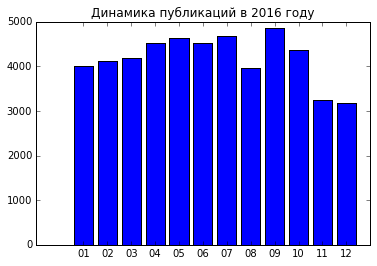

In [30]:
# Распечатываем график динамики публикаций по месяцам 2016 года:
articles_2016_ordered = OrderedDict(sorted(year_2016_by_month.items()))

plt.bar(range(len(articles_2016_ordered)), articles_2016_ordered.values(), align="center")
plt.xticks(range(len(articles_2016_ordered)), articles_2016_ordered.keys())
plt.title(u"Динамика публикаций в 2016 году")

plt.show()

Аккурат с ноября месяца, когда в США прошли президентские выборы и проиграла Хиллари Клинтон, Хартия снизила активность публикаций и завершила декабрь с самым низким показателем в году - 3 183 материала.

Это снижение активности может быть временным явлением, и в будущем сайт может наверстать былой темп. А может и нет.  